# Data wrangling<a id='Data_wrangling'></a>

## Contents<a id='Contents'></a>
* [Data wrangling](#Data_wrangling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
    * [Recap Of Data Science Problem](#Recap_Of_Data_Science_Problem)
    
  * [Imports](#Imports)
  * [Objectives](#Objectives)
  * [Load The Yelp Business Data](#Load_The_Yelp_Business_Data)
      * [City Of Interest](#City_Of_Interest)
  * [Load The Yelp Reviews Data](#Load_The_Yelp_Reviews_Data)
  * [Merge the two datasets](#Merge_the_two_datasets)
  * [Inspect the merged dataset](#Inspect_the_merged_dataset)
      * [Dataset Info for null values](#Dataset_info_for_null_values)
      * [Check for duplicated values](#Check_for_duplicated_values)
      * [Keeping the Five Years Data](#Keeping_the_Five_Years_Data)
      * [Distribution of Stars and Reviews](#Distribution_of_stars_reviews)
  * [Save data](#Save_data)
  * [Summary](#Summary)
    
      


## Introduction<a id='Introduction'></a>

This step focuses on collecting the data, organizing it, and making sure it's well defined. Some data cleaning will be done at this stage.

### Recap Of Data Science Problem<a id='Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with something meaningful for the people who frequently eats out trying different restaurants and my project aims try to build a recommendation model based on the restaurant location and yelp reviews. 

### Imports<a id='Imports'></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Objectives<a id='Objectives'></a>

Here are some fundamental questions I jump in to analyze and explore.

* Do I have the data to tackle the desired question?
* what is the target value?
* Do I have the potentially useful features?
* Do I have any fundamental issues with the data?

### Load The Yelp Business Data<a id = 'Load_The_Yelp_Business_Data'></a>

In [10]:
yelp_b_df = pd.read_json('C:/Users/ad823/Downloads/yelp_dataset/yelp_academic_dataset_business.json',lines=True)

Getting the basic information of this dataset

In [11]:
yelp_b_df.shape

(150346, 14)

In [12]:
yelp_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [13]:
yelp_b_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [14]:
yelp_b_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Based on the link [here](https://idsthu.github.io/about.html), 
is_open has 1 and 0 . value  0 = closed AND  value 1 =  open.# 1 = open, 0 = closed


In [15]:
#since the dataset haas lot of records, I would like to narrow it down by keeping only open businesses
yelp_b_df = yelp_b_df[yelp_b_df['is_open']==1]

In [16]:
yelp_b_df.shape

(119698, 14)

This shows that about 30K businesses are closed now. I am disregarding those closed businesses

In [17]:
#In categories, I would like to choose those which contains  restaurants
business_restaurants = yelp_b_df[yelp_b_df['categories'].str.contains(
              'Restaurants',
              case=False, na=False)]

In [18]:
business_restaurants.shape

(34987, 14)

In [19]:
business_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."


In [23]:

business_restaurants.groupby(["city"]).size().sort_values(ascending=False)

city
Philadelphia      3525
Tampa             1964
Indianapolis      1904
Nashville         1681
Tucson            1639
                  ... 
Santa  Barbara       1
Sanatoga             1
Gwynedd Valley       1
Haddon Twp           1
wimauma              1
Length: 846, dtype: int64

### City Of Interest<a id='City_Of_Interest'></a>

Due to the sheer size of this dataset, I decided to concentrate my efforts on restaurant reviews data in the city of Philadelphia as it had the most number of businesses as compared to the other cities in this dataset

In [35]:
business_restaurants[(business_restaurants.city == 'Philadelphia') | (business_restaurants.city == 'philadelphia')].shape

(3526, 14)

In [36]:
philly_restaurants = business_restaurants[(business_restaurants.city == 'Philadelphia') | (business_restaurants.city == 'philadelphia')]

In [37]:
philly_restaurants.shape

(3526, 14)

In [38]:
philly_restaurants.groupby(['city']).agg({'review_count':sum}).sort_values(by='review_count',ascending=False)

,review_count
city,
Philadelphia,495387
philadelphia,119


In [39]:
philly_restaurants.replace('philadelphia', 'Philadelphia', inplace=True)

C:\Users\ad823\AppData\Local\Temp\ipykernel_24064\385543959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philly_restaurants.replace('philadelphia', 'Philadelphia', inplace=True)


In [40]:
philly_restaurants.groupby(['city']).agg({'review_count':sum}).sort_values(by='review_count',ascending=False)

,review_count
city,
Philadelphia,495506


In [41]:
drop_columns = ['is_open','attributes','hours']
philly_df = philly_restaurants.drop(drop_columns, axis=1)

In [42]:
philly_df.shape

(3526, 11)

In [43]:
csv_name = "philly_restaurants.csv"
philly_df.to_csv(csv_name, index=False)

### At this stage, I saved the business data with a total of 3526 Restaurants with 495506 Restaurant Reviews in Philadelphia. To this, I will merge yelp reviews dataset

### Load The Yelp Reviews Data<a id = 'Load_The_Yelp_Reviews_Data'></a>

{"review_id":"KU_O5udG6zpxOg-VcAEodg","user_id":"mh_-eMZ6K5RLWhZyISBhwA","business_id":"XQfwVwDr-v0ZS3_CbbE5Xw","stars":3.0,"useful":0,"funny":0,"cool":0,"text":"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.","date":"2018-07-07 22:09:11"}


In [44]:
size = 1000000
review = pd.read_json('C:/Users/ad823/Downloads/yelp_dataset/yelp_academic_dataset_review.json', lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

### Merge the two datasets<a id='Merge_the_two_datasets'></a>

In [45]:
# There are multiple chunks to be read
chunk_list = []
for chunk_review in review:
    # Drop columns that aren't needed
    #chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'yelp_review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(philly_df, chunk_review, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
final_df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

79400 out of 1,000,000 related reviews
78403 out of 1,000,000 related reviews
76491 out of 1,000,000 related reviews
69450 out of 1,000,000 related reviews
71293 out of 1,000,000 related reviews
69596 out of 1,000,000 related reviews
66624 out of 1,000,000 related reviews


### Inspect the merged dataset<a id='Inspect_the_merged_dataset'></a>

In [46]:
final_df.shape

(511257, 19)

In [47]:
final_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,review_id,user_id,yelp_review_stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35


In [48]:
final_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'categories',
       'review_id', 'user_id', 'yelp_review_stars', 'useful', 'funny', 'cool',
       'text', 'date'],
      dtype='object')

In [49]:
drop_columns = ['stars']
cp2_philly_data = final_df.drop(drop_columns, axis=1)

In [50]:
cp2_philly_data.shape

(511257, 18)

In [51]:
cp2_philly_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'review_count', 'categories', 'review_id',
       'user_id', 'yelp_review_stars', 'useful', 'funny', 'cool', 'text',
       'date'],
      dtype='object')

In [52]:
cp2_philly_data['name'].value_counts()

Reading Terminal Market    5778
Pat's King of Steaks       4293
Geno's Steaks              3433
El Vez                     3264
Zahav                      3173
                           ... 
Gourmay Diner                 5
Liu's Garden                  5
Golden China                  5
Cozette Pizza                 5
Smoked and Chopped            5
Name: name, Length: 3043, dtype: int64

In [53]:
print(cp2_philly_data['date'].str.extract(r'(\d{4})')[0].unique())

['2014' '2013' '2018' '2012' '2017' '2011' '2010' '2016' '2008' '2009'
 '2015' '2020' '2019' '2021' '2022' '2006' '2007' '2005']


In [54]:
cp2_philly_data.dtypes

business_id           object
name                  object
address               object
city                  object
state                 object
postal_code           object
latitude             float64
longitude            float64
review_count           int64
categories            object
review_id             object
user_id               object
yelp_review_stars      int32
useful                 int32
funny                  int32
cool                   int32
text                  object
date                  object
dtype: object

### Changing the date column to date format

In [55]:
cp2_philly_data['date'] = pd.to_datetime(cp2_philly_data.date, format='%Y-%m-%d')

In [56]:
cp2_philly_data.dtypes

business_id                  object
name                         object
address                      object
city                         object
state                        object
postal_code                  object
latitude                    float64
longitude                   float64
review_count                  int64
categories                   object
review_id                    object
user_id                      object
yelp_review_stars             int32
useful                        int32
funny                         int32
cool                          int32
text                         object
date                 datetime64[ns]
dtype: object

In [58]:

cp2_philly_data['year'] = pd.DatetimeIndex(cp2_philly_data['date']).year

In [59]:

cp2_philly_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'review_count', 'categories', 'review_id',
       'user_id', 'yelp_review_stars', 'useful', 'funny', 'cool', 'text',
       'date', 'year'],
      dtype='object')

### Dataset Info for null values<a id='Dataset_info_for_null_values'></a>

In [60]:
cp2_philly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511257 entries, 0 to 511256
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   business_id        511257 non-null  object        
 1   name               511257 non-null  object        
 2   address            511257 non-null  object        
 3   city               511257 non-null  object        
 4   state              511257 non-null  object        
 5   postal_code        511257 non-null  object        
 6   latitude           511257 non-null  float64       
 7   longitude          511257 non-null  float64       
 8   review_count       511257 non-null  int64         
 9   categories         511257 non-null  object        
 10  review_id          511257 non-null  object        
 11  user_id            511257 non-null  object        
 12  yelp_review_stars  511257 non-null  int32         
 13  useful             511257 non-null  int32   

### Check for duplicated values<a id='Check_for_duplicated_values'></a>

In [63]:
cp2_philly_df.duplicated(subset=None, keep='first')

3         False
5         False
17        False
24        False
35        False
          ...  
511252    False
511253    False
511254    False
511255    False
511256    False
Length: 192386, dtype: bool

### Keeping the Five Years Data<a id= 'Keeping_the_Five_Years_Data'></a>

In [61]:
# Since the data is huge after merging, I will keep only records from 2018-2022
cp2_philly_df = cp2_philly_data[cp2_philly_data.year > 2017]

In [70]:
cp2_philly_df.year.unique()

array([2018, 2020, 2019, 2021, 2022], dtype=int64)

In [68]:
n_reviews = len(cp2_philly_df)
n_businesses = cp2_philly_df.business_id.unique().size
n_user_ids = cp2_philly_df.user_id.unique().size

In [69]:
print("Number of reviews: ",n_reviews)
print("Number of Businesses: ",n_businesses)
print("Number of UserIds: ",n_user_ids)


Number of reviews:  192386
Number of Businesses:  3460
Number of UserIds:  84238


### So, I will start exploring this philadelphia restaurant reviews data which has a total of 3,460 Restaurants, 84,238 Users, and 192,386 Restaurant Reviews  from 2018–2022.

In [71]:
cp2_philly_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,review_id,user_id,yelp_review_stars,useful,funny,cool,text,date,year
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57,2018
5,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",_hJu0u6nB-8LIeQJY4Vg4w,KQSRUu4Aapl0hG6eu2v8iw,4,1,0,0,This is my favorite bakery in Chinatown! I usu...,2018-03-17 23:47:25,2018
17,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",3LNKer0gTFgknV-2CyPjAg,z-yvbUGwFn8PAijEHdU_RA,5,0,0,0,While I've never tried their bao (and usually ...,2018-03-25 12:35:42,2018
24,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",ibUkH1a01VZgBD9ba6wocw,h-NFrVwhhCvxdle_3pBwiQ,5,1,0,0,Got my wedding cake here and it was the best d...,2018-04-12 20:59:21,2018
35,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",L3Qk84zgSO4U3IsZoz3G4w,2Gp0gQNpIVmShIt3-gOebw,4,1,0,0,Just came from this bakery this afternoon and ...,2018-05-05 22:26:47,2018


In [83]:
cp2_philly_df.describe()

,latitude,longitude,review_count,yelp_review_stars,useful,funny,cool,year
count,192386.000000,192386.000000,192386.000000,192386.000000,192386.000000,192386.000000,192386.000000,192386.000000
mean,39.964116,-75.158452,620.037643,3.907628,1.048564,0.280197,0.544982,2019.264635
std,0.038558,0.039540,885.630154,1.386792,2.916298,1.430737,2.306958,1.116675
min,39.865466,-75.363647,5.000000,1.000000,0.000000,0.000000,0.000000,2018.000000
25%,39.948013,-75.170899,117.000000,3.000000,0.000000,0.000000,0.000000,2018.000000
50%,39.951780,-75.161093,284.000000,4.000000,0.000000,0.000000,0.000000,2019.000000
75%,39.965399,-75.148727,691.000000,5.000000,1.000000,0.000000,0.000000,2020.000000
max,40.133248,-74.957990,5721.000000,5.000000,224.000000,135.000000,163.000000,2022.000000


### Distribution of Stars and Reviews<a id='Distribution_of_stars_reviews'></a>

In [72]:
cp2_philly_df.yelp_review_stars.unique()

array([5, 4, 1, 2, 3])

In [84]:
x_val=cp2_philly_df['yelp_review_stars'].value_counts().index
print(x_val)

Int64Index([5, 4, 1, 3, 2], dtype='int64')


In [85]:
y_val=cp2_philly_df['yelp_review_stars'].value_counts()
print(y_val)

5    95959
4    41105
1    22565
3    19479
2    13278
Name: yelp_review_stars, dtype: int64


In [103]:
stars = [5,4,1,3,2]
stars_count = [95959, 41105, 22565, 19479, 13278]
 
# Create a pandas dataframe
df = pd.DataFrame({"Stars": stars,
                   "Star_Count": stars_count})
df
 

,Stars,Star_Count
0,5,95959
1,4,41105
2,1,22565
3,3,19479
4,2,13278


Text(0.5, 1.0, 'Distribution of yelp review stars')

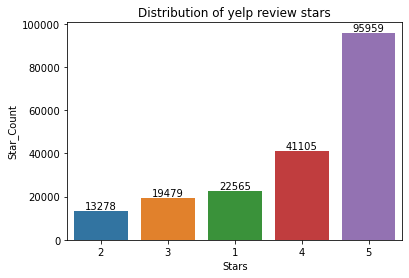

In [106]:
ax = sns.barplot(x='Stars',
            y="Star_Count", data=df,errwidth=0,
            order=df.sort_values('Star_Count').Stars)
 
# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of yelp review stars')

In [108]:
cp2_philly_df.useful.unique()

array([  5,   1,   0,   2,  35,   7,   6,   3,   4,  27,  32,  12,  11,
        23,  15,  34,   9,   8,  17,  16,  36,  20,  26,  13,  48,  10,
        22,  25,  18,  47,  60,  37,  40,  38,  14, 115,  19,  44,  33,
       142,  31,  29,  21,  54,  24,  41,  28,  80,  53,  57,  30,  43,
        69,  46,  73,  66,  96,  51,  39,  72,  78,  56,  45,  55,  52,
        62,  42,  75,  49,  58,  50,  67,  63,  95,  98,  71, 164,  88,
       111,  65,  64, 102,  77,  76, 134, 224,  81,  59])

In [109]:
cp2_philly_df.funny.unique()

array([  0,  14,   1,   2,   3,  12,   6,   5,   7,   4,   8,  15,  23,
        11,  13,  28,  10,  21,  26,   9,  74,  18, 113,  27,  29,  16,
        19,  34,  17,  22,  25,  38,  20,  39,  48,  52,  54,  30,  45,
        55,  35,  44,  40,  31,  24,  36,  75,  32,  72,  33,  67, 135,
        66,  70,  82,  46,  57,  41,  49,  43])

In [110]:
cp2_philly_df.cool.unique()

array([  5,   0,   2,   1,   3,  26,  19,   4,  29,   7,  14,  24,   8,
        10,   6,  11,  15,  16,  18,  21,  40,   9,  17,  22,  34,  12,
        52,  13,  37,  27,  39,  28, 109,  36,  33, 142,  20,  41,  35,
        23,  31,  30,  32,  75,  25,  48,  58,  49,  43,  63,  59,  86,
        73,  64,  74,  51,  38,  47,  57,  45,  69,  42,  72,  50,  60,
        56,  94,  44,  99,  46,  55,  91,  61, 163,  85,  96,  54,  53,
       112,  65,  93,  68,  62,  92,  71])

In [107]:
useful_reviews = len(cp2_philly_df[cp2_philly_df["useful"]>0])
cool_reviews = len(cp2_philly_df[cp2_philly_df["cool"]>0])
funny_reviews = len(cp2_philly_df[cp2_philly_df["funny"]>0])
negative_reviews = len(cp2_philly_df[cp2_philly_df["yelp_review_stars"] < 3])
positive_reviews =len(cp2_philly_df[cp2_philly_df["yelp_review_stars"] > 2])
total_reviews = len(cp2_philly_df)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {} ".format(useful_reviews))
print("Funny reviews: {} ".format(funny_reviews))
print("Cool reviews: {}  ".format(cool_reviews))
print("Total negative reviews: {}  ".format(negative_reviews))
print("Total positive reviews: {} ".format(positive_reviews))



Total reviews: 192386
Useful reviews: 81840 
Funny reviews: 26348 
Cool reviews: 43824  
Total negative reviews: 35843  
Total positive reviews: 156543 


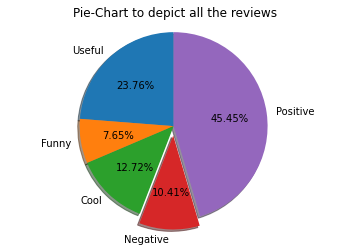

In [113]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Useful', 'Funny', 'Cool', 'Negative', 'Positive'
sizes = [42.54, 13.70, 22.78, 18.63, 81.37]
explode = (0,0,0, 0.1, 0)  # only "explode" the 4th slice (i.e. 'Negative')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        autopct=lambda p:f'{p:.2f}%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie-Chart to depict all the reviews")
plt.show()

### Save data<a id='Save_data'></a>

In [114]:
#saving this file
csv_name = "clean_cp2_philly_data.csv"
cp2_philly_df.to_csv(csv_name, index=False)

### Summary<a id='summary'></a>

Loaded two json files from yelp and merged into one file. Chose city of choice to be Philadelphia as i found more number of restaurants associated with it and more number of reviews. Since data is huge, I had to narrow it one city, one category which is restaurants and to further reduce the size I had to take only 5 years of data. I did not find any duplicated records and no null values. Changed the data type of the date field to date timestamp. Observed the distribution of all stars and reviews.

Regarding the objective questions I had in my mind: 

* Do I have the data to tackle the desired question? - Yes
* what is the target value? - Positive (5,4, 3 star) and Negative (1 & 2 star) Reviews
* Do I have the potentially useful features? - Yes. I can use latitude and longitude to see what restaurants are nearby and based on the reviews we can recommend those restaurants to the customer. 
* Do I have any fundamental issues with the data? - Distribution of stars might be a concern as it is leaning towards imbalanced classification. 
Star distribution in percentages:
    * 5-star 49.88% 
    * 4-star 21.37% 
    * 3-star 10.12% 
    * 2-star 6.9% 
    * 1-star 11.73% 